(c_vectors)=

# Vector Data 

## GeoPandas

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

## Data Structures

GeoPandas implements two main data structures, a `GeoSeries` and a `GeoDataFrame`. These are subclasses of pandas Series and DataFrame, respectively.

### GeoSeries

A `GeoSeries` is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

geopandas has three basic classes of geometric objects (which are actually shapely objects):

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

In [1]:
import geopandas
from shapely.geometry import Point
s = geopandas.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])
s

0    POINT (1.00000 1.00000)
1    POINT (2.00000 2.00000)
2    POINT (3.00000 3.00000)
dtype: geometry

In [2]:
from shapely.geometry import LineString
l= geopandas.GeoSeries([LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
l

0    LINESTRING (-77.03687 38.90719, -76.61219 39.2...
dtype: geometry

In [3]:
from shapely.geometry import Polygon
p= geopandas.GeoSeries([Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
p

0    POLYGON ((-77.03687 38.90719, -76.61219 39.290...
dtype: geometry

Note that all entries in a `GeoSeries` need not be of the same geometric type, although certain export operations will fail if this is not the case.

### GeoDataFrame
A `GeoDataFrame` is a tabular data structure that contains a `GeoSeries`.

The most important property of a `GeoDataFrame` is that it always has one `GeoSeries` column that holds a special status. This `GeoSeries` is referred to as the `GeoDataFrame’s` “geometry”. When a spatial method is applied to a `GeoDataFrame` (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

The “geometry” column – no matter its name – can be accessed through the geometry attribute (gdf.geometry), and the name of the geometry column can be found by typing gdf.geometry.name.

```{note}
A `GeoDataFrame` may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the `GeoDataFrame.set_geometry()` method.
```

An example using the worlds `GeoDataFrame`:

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

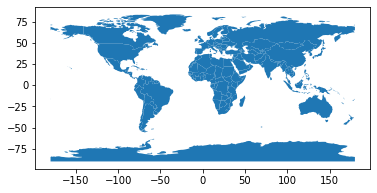

In [5]:
world.plot()